In [74]:
'''
This is a program to compare 3 sorting algorithims i.e Insertion sort , Merge sort and Quick sort
based on the number of comparisons performed by them

@auther Rohit kumar
'''

from matplotlib.pyplot import *
from random import *
import numpy

In [60]:
def insort(a):
    '''
    This is a function to sort a list of number using insertion sort and return the number of comparisons in it
    
    PARAMETERS :-
        a : List of numbers
        
    RETURN :-
                returns number of comparisons
    '''
    comp=0      # number of comparisons
    i=1
    while i<len(a):
        j=i-1
        x=a[i]
        while j>=0 and x<a[j]:
            a[j+1]=a[j]
            j-=1
            comp+=1
        a[j+1]=x
        i+=1
    return comp


'''------------------------------------------------------------------------------------------------------------'''
def merge(a,n,i=0):
    '''
    This is a function to merge and sort a part of list which is sorted from 'i' to 'n/2' and from 'n/2' to 'n' 
    where i is the start position and n is the ending position
    and return number of comparisons done 
    
    PARAMETERS :-
        a : list sorted from 'i' to 'n/2' and from 'n/2' to 'n'
        n : end location of list 'a'
        i : start position of list 'a'
    Return :-
        return number of comparisons done
    '''
    l=i
    mid=int((i+n)/2)
    j=mid
    comp=0              # number of comparisons
    c=[]                # temprory list to store merged list 
    while j<n and l<mid:
        comp+=1
        if a[l]<a[j]:
            c.append(a[l])
            l+=1
        else:
            c.append(a[j])
            j+=1
    comp+=1        
    if j==n:
        while l<mid:
            c.append(a[l])
            l+=1
    else:
        while j<n:
            c.append(a[j])
            j+=1
    k=0
    while i<n:
        a[i]=c[k]
        k+=1
        i+=1
        
    return comp
        
'''------------------------------------------------------------------------------------------------------------'''
def mergesort(a,i,n):
    '''
    This is a function to sort a list and compute the number of comparisons performed
    
    PARAMETERS :-
        a : list to be sorted
        i : start position of list
        n : size of list
    RETURNS :-
        number of comparisons
    '''
    if i>=(n-1):
        return 0
    x=i+n
    x=int(x/2)
    comp=0
    comp+=mergesort(a,i,x)
    comp+=mergesort(a,x,n)
    comp+=merge(a,n,i)
    return comp

'''----------------------------------------------------------------------------------------------------------------'''
def partition(a,n,i=0):
    '''
    It is a function to seprate the list into two parts first part which is less than a[i] 
    and second part greater than a[i] ( The two parts are made in the same list ). And it return number
    of comparisons done during this and the location of pivot element after swapping.
    
    Note: the list may not be sorted 
    
    PARAMETERS :-
        a: the list to seprate into two parts
        n: size of list
        i: start position of list
    
    Returns :-
            returns a tuple (the number of comparisons done, the location of pivot element)
    '''
    comp=0                                                 # number of comparisons done
    piv=a[i]
    d=i+1
    u=n-1                                                  # top pointer which is location pivot needs to pbe placed at the end
    while d<=u:
        while d<n and piv>=a[d]:
            comp+=1
            d+=1
        while u>=i and piv<a[u]:
            comp+=1
            u-=1
        if d>u:
            break
        temp=a[d]
        a[d]=a[u]
        a[u]=temp
    a[i]=a[u]
    a[u]=piv
    
    return comp,u

'''--------------------------------------------------------------------------------------------------------------'''
def quicksort(a,i,n):
    '''
    It is a function to sort the list using quick sort technique and return the number of comparisons performed by it
    
    PARAMETERS:-
        a: the list to be sorted
        i: start position of list
        n: size of list
    RETURNS :-
        Returns the number of comparisons performed
    '''
    if i>=(n-1):
        return 0
    comp,u=partition(a,n,i)
    comp+=quicksort(a,i,u)
    comp+=quicksort(a,u+1,n)
    
    return comp

In [70]:
a1=[]
a2=[]
a3=[]
b=[]
n=10
k=0
while n<=1010:
    a1.append(0)
    a2.append(0)
    a3.append(0)
    for j in range(20):
        b=[]
        for i in range(n):
            b.append(randrange(10000))
        c=list(b)
        a1[k]+=insort(b)
        b=list(c)
        a2[k]+=mergesort(b,0,len(b))
        a3[k]+=quicksort(c,0,len(c))
    a1[k]=a1[k]/20
    a2[k]=a2[k]/20
    a3[k]=a3[k]/20
    k+=1
    n+=10

In [71]:
t=list(range(10,1101))
x=[]
x=x+t[:1001:10]
print(x)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010]


## NO OF COMPARISONS

In [72]:
print("Insertion sort = "+str(a1))
print()
print("Merge sort = "+str(a2))
print()
print("Quick sort = "+str(a3))

Insertion sort = [22.65, 97.5, 225.95, 380.55, 596.4, 886.35, 1235.15, 1577.2, 2023.6, 2455.8, 2973.2, 3575.55, 4171.55, 4859.35, 5527.5, 6420.85, 7161.05, 8028.5, 8906.75, 9938.8, 11049.55, 12029.4, 13217.8, 14146.1, 15527.75, 16643.4, 18155.85, 19666.1, 20942.2, 22288.55, 23859.9, 25676.0, 27088.0, 28840.1, 30762.2, 32204.3, 34383.25, 35801.8, 37640.95, 40036.7, 41498.7, 44431.45, 46395.15, 48138.4, 50312.65, 53113.05, 55540.6, 56125.7, 60354.5, 61920.55, 64616.25, 67474.4, 70312.95, 72609.8, 75460.05, 78541.45, 80414.9, 84762.8, 85903.85, 89592.35, 92872.0, 95192.85, 98609.65, 102613.6, 106189.2, 108944.2, 111187.6, 114643.1, 119212.4, 122412.2, 127236.25, 129334.35, 134243.95, 137482.35, 140003.7, 145063.35, 147882.0, 151884.5, 155726.55, 160357.65, 162811.35, 167688.65, 172162.7, 176653.1, 179582.85, 184958.8, 190773.55, 193974.2, 198772.95, 201491.35, 208330.75, 211742.05, 215019.65, 219271.45, 224986.9, 230028.1, 235127.75, 240878.4, 245184.3, 249735.7, 254747.95]

Merge sort = 

## Insertion sort

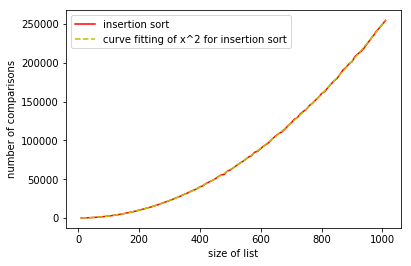

In [100]:
plot(x,a1,'r',label='insertion sort')
z=numpy.polyfit(x,a1,2)
p=numpy.poly1d(z)
plot(x,p(x),'y--',label='curve fitting of x^2 for insertion sort')
xlabel('size of list')
ylabel('number of comparisons')
legend(loc='upper left')
show()

## Merge sort

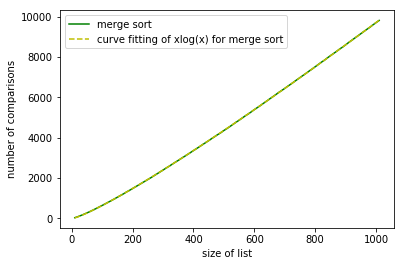

In [101]:
plot(x,a2,'g',label='merge sort')
x2=x*numpy.log(x)
z=numpy.polyfit(x2,a2,1)
p=numpy.poly1d(z)
plot(x,p(x2),'y--',label='curve fitting of xlog(x) for merge sort')
legend(loc='upper left')
xlabel('size of list')
ylabel('number of comparisons')
show()

## Quick Sort

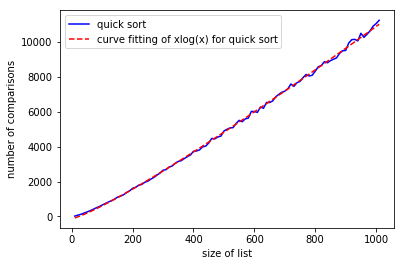

In [102]:
plot(x,a3,'b',label='quick sort')
x2=x*numpy.log(x)
z=numpy.polyfit(x2,a3,1)
p=numpy.poly1d(z)
plot(x,p(x2),'r--',label='curve fitting of xlog(x) for quick sort')
legend( loc='upper left')
xlabel('size of list')
ylabel('number of comparisons')
show()

# all graph

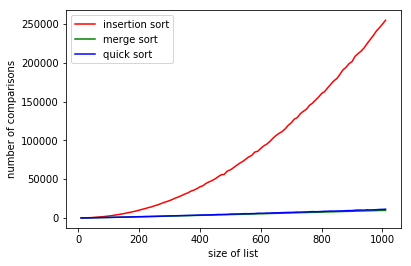

In [103]:
plot(x,a1,'r',label='insertion sort')
plot(x,a2,'g',label='merge sort')
plot(x,a3,'b',label='quick sort')
legend(loc='upper left')
xlabel('size of list')
ylabel('number of comparisons')
show()

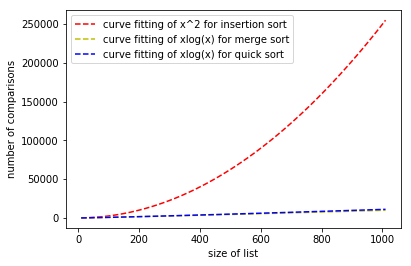

In [105]:
z=numpy.polyfit(x,a1,2)
p=numpy.poly1d(z)
plot(x,p(x),'r--',label='curve fitting of x^2 for insertion sort')

x2=x*numpy.log(x)
z=numpy.polyfit(x2,a2,1)
p=numpy.poly1d(z)
plot(x,p(x2),'y--',label='curve fitting of xlog(x) for merge sort')

x2=x*numpy.log(x)
z=numpy.polyfit(x2,a3,1)
p=numpy.poly1d(z)
plot(x,p(x2),'b--',label='curve fitting of xlog(x) for quick sort')

legend(loc='upper left')
xlabel('size of list')
ylabel('number of comparisons')
show()